In [49]:
#data analysis
import pandas as pd
import numpy as np 

#Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

#machine learning and evaluation
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, homogeneity_score



import warnings
warnings.filterwarnings("ignore")

In [50]:
# load  data

data = pd.read_csv(r"C:/Users/uzond/Downloads/Customers.csv")

In [51]:
data.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [52]:
data.shape

(200, 5)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [54]:
data.describe()


,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: >

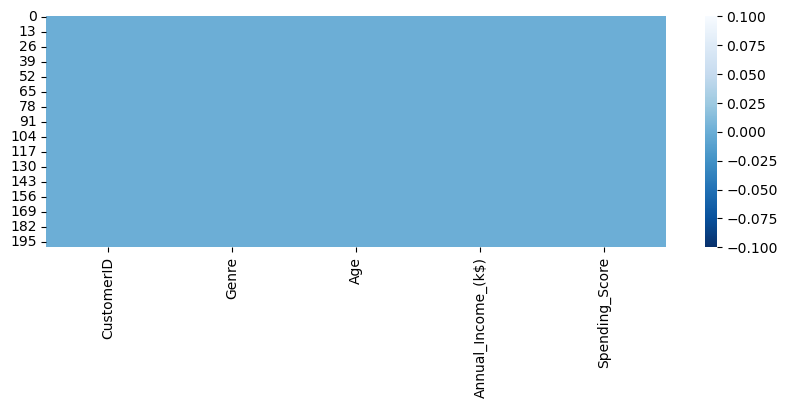

In [55]:
data.isnull().sum()

plt.figure(figsize = (10,3))
sns.heatmap(data.isnull(), cbar = True, cmap = "Blues_r")

## Data cleanining and Preprocessing

In [56]:
data.duplicated().sum()

0

# Exploratory Data Analysis

#### univariate analysis

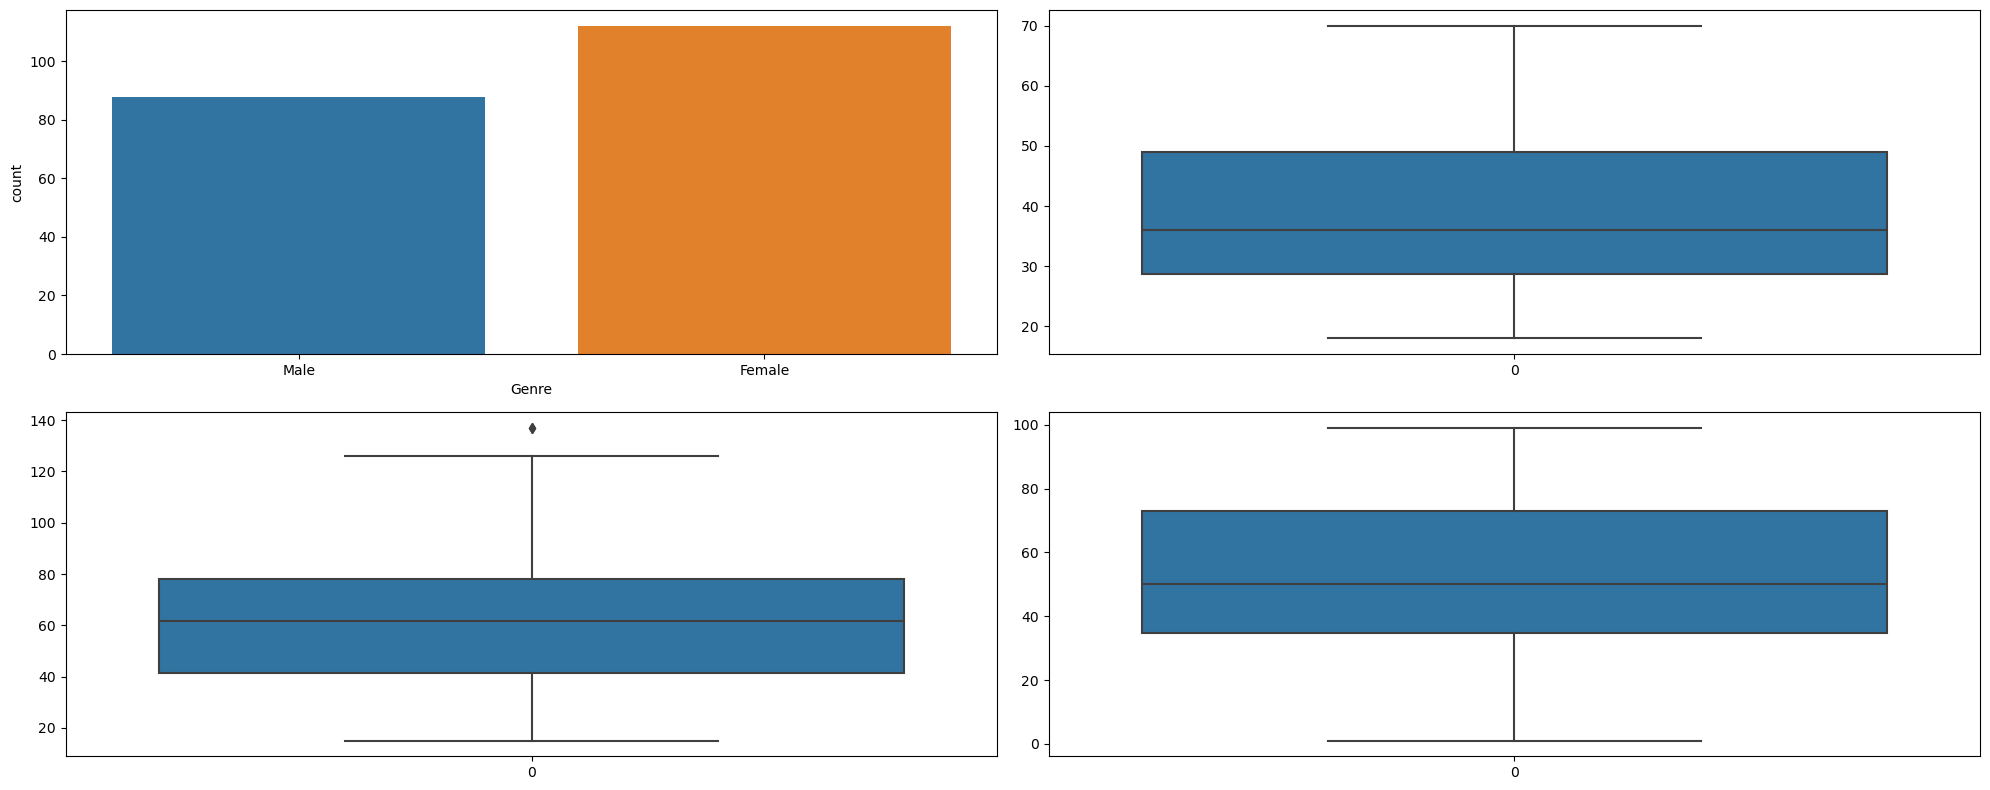

In [57]:
fig, axs = plt.subplots(2,2,figsize =(20,8))
plt1 =sns.countplot(x=data['Genre'], ax = axs[0,0])
plt2 =sns.boxplot(data['Age'], ax = axs[0,1])
plt3 =sns.boxplot(data['Annual_Income_(k$)'], ax = axs[1,0])
plt4 =sns.boxplot(data['Spending_Score'], ax = axs[1,1])

plt.tight_layout()

In [58]:
data = data.drop('CustomerID', axis =1)

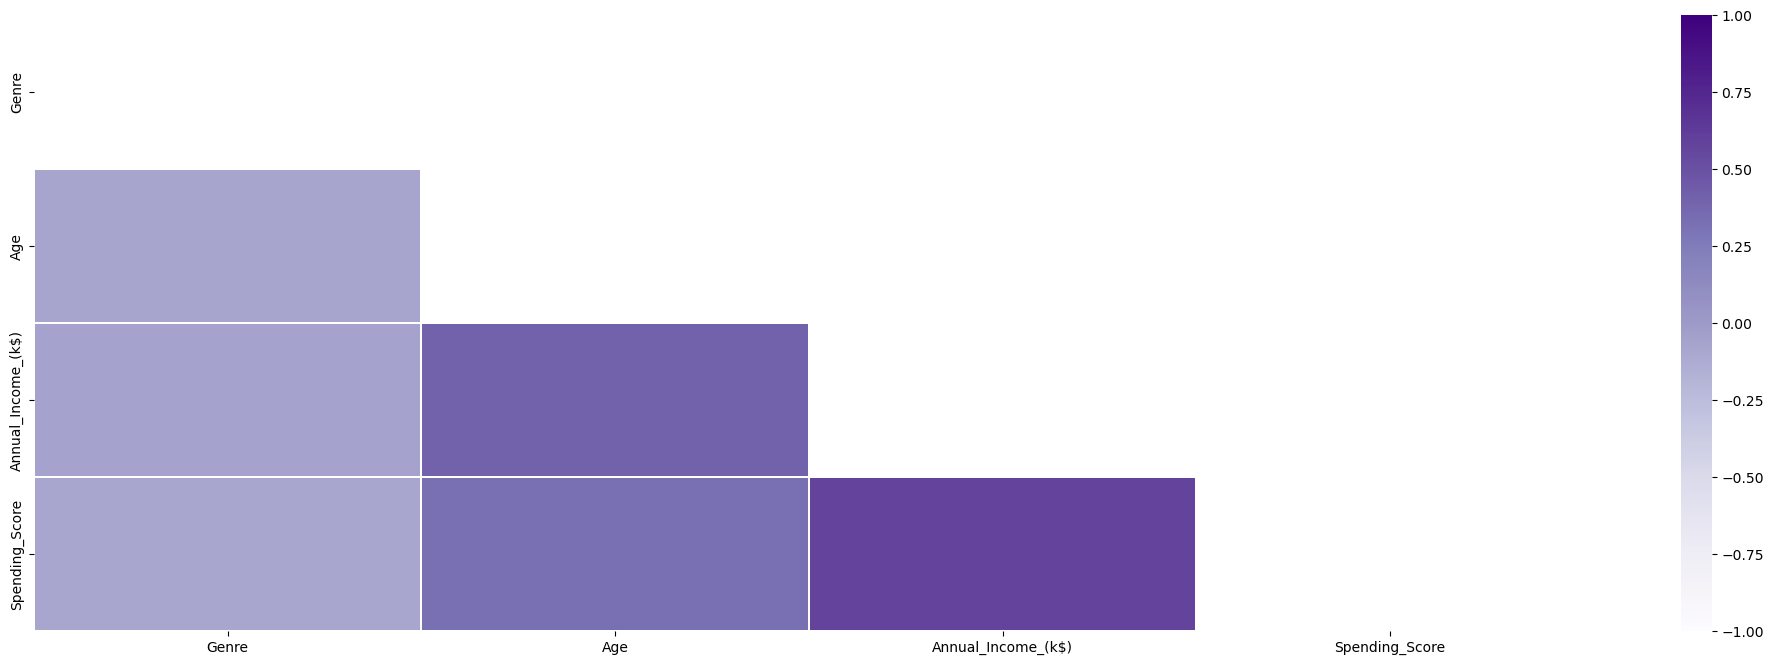

In [59]:
plt.figure(figsize=(25, 8))

corr = data.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='Purples', vmin=-1, vmax=1)

In [60]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [61]:
data['Genre'] = encoder.fit_transform(data['Genre'])
        
data.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


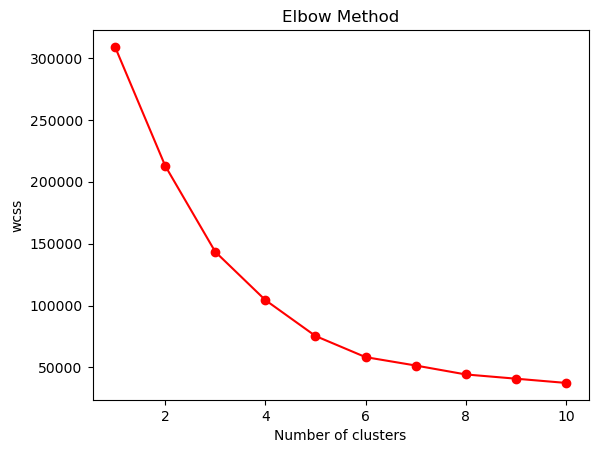

In [67]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters =i, init ='k-means++',random_state = 42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,color= 'red',marker ='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()
         

In [86]:
kmeans = KMeans(n_clusters = 5, init ='k-means++',random_state = 42)
kmeans.fit(data)

KMeans(n_clusters=5, random_state=42)

In [87]:
data['cluster'] =kmeans.labels_

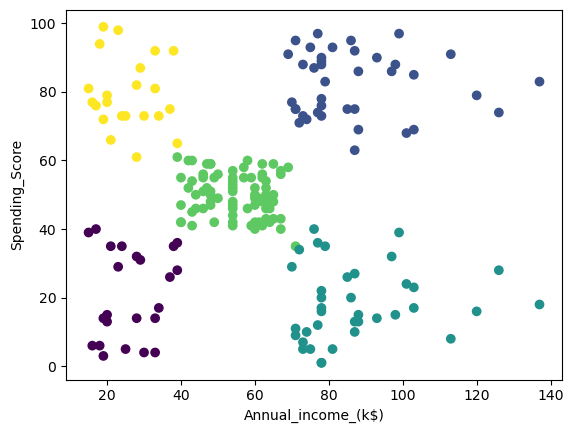

0.44493777835059417

In [88]:
plt.scatter(data['Annual_Income_(k$)'], data['Spending_Score'],  c =data['cluster'], label = 'centroid')
plt.xlabel('Annual_income_(k$)')
plt.ylabel('Spending_Score')
plt.show()

silhouette_score(data,kmeans.labels_)

The results of a K-Means clustering algorithm were applied to a dataset with two features: Annual_Income_(k$) and Spending_Score. The different colors represent distinct clusters.

Interpreting the Clusters

Based on the visualization, we can observe several distinct clusters:

High Income, High Spending: This cluster is likely composed of individuals with high annual incomes and high spending scores. These individuals might be affluent consumers who enjoy luxury goods and services.

High Income, Low Spending: This cluster represents individuals with high incomes but relatively low spending scores. They may be more frugal or prioritize savings over consumption.

Low Income, Low Spending: This cluster includes individuals with both low income and low spending scores. This could represent individuals with limited financial resources or those who are more conservative in their spending habits.

Low Income, High Spending: This cluster is interesting because it suggests individuals with limited financial resources but high spending scores. This could indicate individuals who rely on credit or loans to maintain their spending habits or who may have different spending priorities.
Additional Considerations

Cluster Centers: The centers of each cluster can provide insights into the typical characteristics of individuals within that group.
Cluster Size: The size of each cluster can indicate the relative frequency of different consumer segments.
Feature Importance: The relative importance of Annual_Income_(k$) and Spending_Score in determining cluster membership can be assessed by examining how well these features separate the clusters.